<a href="https://colab.research.google.com/github/mendiang/Google-Bangkit-Final-Project/blob/master/Coin_Prediction_using_Keras_CNN_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install Kaggle
!pip install Kaggle

DOWNLOAD DATASET FROM KAGGLE

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"daniaester","key":"4d688018fcbb4debd8f4770c5b97ce20"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change teh permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d wanderdust/coin-images

 99% 453M/459M [00:11<00:00, 53.3MB/s]
100% 459M/459M [00:11<00:00, 41.2MB/s]


UNZIPPING FILE

In [ ]:
import os
import zipfile

local_zip = 'coin-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

SETTING UP DIRECTORY FOR TRAIN AND VALIDATION

In [ ]:
path = "/tmp/coins/data/"
train = path + "train/"
validation = path + "validation/"

train_folders = []
train_images =[]
    
validation_folders = []
validation_images = []

# FOR TRAINING

train_folders = os.listdir(train) 
for folder in train_folders:
  curr_folder_path = os.path.join(train,folder)
  for files in os.listdir(curr_folder_path):
    train_images.append(os.path.join(curr_folder_path, files))

print(train_images)

# print("folder names :")
# for folders in train_folders:
#   print(folders)

# print("images path :")
# for images in train_images:
#   print(images)

# print(train_images)

# FOR VALIDATION

validation_folders = os.listdir(validation)
for folders in validation_folders:
  curr_val_path = os.path.join(validation, folders)
  for files in os.listdir(curr_val_path):
    validation_images.append(os.path.join(curr_val_path, files))

print(validation_images)


['/tmp/coins/data/train/51/020__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/002__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/022__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/009__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/013__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/018__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/029__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/017__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/014__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/007__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/031__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/003__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/011__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/010__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/016__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/004__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/026__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/008__5 Kroner_denmark.jpg', '/tmp/coins/data/train/51/0

In [ ]:
import json

with open('/tmp/coins/data/cat_to_name.json', 'r') as json_file:
    cat_to_name = json.load(json_file)

print(cat_to_name['150'])

5 Kopeks,Russian Ruble,russia


In [ ]:
print("Total training coin images", len(train_images))
print("Total validation coin images", len(validation_images))

Total training coin images 6413
Total validation coin images 844


In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
keras.__version__

'2.3.1'

In [ ]:
keras.preprocessing

<module 'keras.preprocessing' from '/usr/local/lib/python3.6/dist-packages/keras/preprocessing/__init__.py'>

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

batch_size = 60

TRAINING_DIR = "/tmp/coins/data/train/"
training_datagen = ImageDataGenerator(
          rescale = 1./255,
          rotation_range = 40,
          width_shift_range = 0.2,
          height_shift_range = 0.2,
          shear_range = 0.2,
          zoom_range = 0.2,
          horizontal_flip = True,
          fill_mode = 'nearest',
          featurewise_std_normalization=True,
          samplewise_std_normalization=True)

VALIDATION_DIR = "/tmp/coins/data/validation/"
validation_datagen = ImageDataGenerator(
          rescale = 1./255,
          rotation_range = 40,
          width_shift_range = 0.2,
          height_shift_range = 0.2,
          shear_range = 0.2,
          zoom_range = 0.2,
          horizontal_flip = True,
          fill_mode = 'nearest',
          featurewise_std_normalization=True,
          samplewise_std_normalization=True)

TEST_DIR = "/tmp/coins/data/test"
test_datagen = ImageDataGenerator(
          rescale=1./255,
          featurewise_std_normalization=True,
          samplewise_std_normalization=True)

TEST_DIR = "/tmp/coins/data/test"

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = batch_size
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = batch_size
)

test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(150, 150),
        batch_size= batch_size,q
        class_mode='categorical')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 6413 images belonging to 211 classes.
Found 844 images belonging to 211 classes.
Found 844 images belonging to 211 classes.


In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(211, activation='softmax')
])

num_train = len(train_generator.filenames)
num_valid = len(validation_generator.filenames)

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs = 25, steps_per_epoch=num_train/batch_size, validation_data = validation_generator, verbose = 1, validation_steps=num_valid/batch_size)

model.save("rps.h5")

Found 6413 images belonging to 211 classes.
Found 844 images belonging to 211 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
___________________________________

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(211, activation='softmax')
])

num_train = len(train_generator.filenames)
num_valid = len(validation_generator.filenames)

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(train_generator, epochs = 100, steps_per_epoch=num_train/batch_size, validation_data = validation_generator, verbose = 1, validation_steps=num_valid/batch_size)

model.save("Adam.h5")

USING TRANSFER LEARNING

In [ ]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(211,activation='softmax')(x) #final layer with softmax activation

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 2s 0us/step


In [ ]:
model=Model(inputs=base_model.input,outputs=preds)

In [ ]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator=train_datagen.flow_from_directory(TRAINING_DIR, # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 6413 images belonging to 211 classes.


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Epoch 1/5
200/200 [==============================] - 842s 4s/step - loss: 3.9208 - accuracy: 0.2003
Epoch 2/5
200/200 [==============================] - 842s 4s/step - loss: 1.8168 - accuracy: 0.5455
Epoch 3/5
200/200 [==============================] - 877s 4s/step - loss: 1.1821 - accuracy: 0.6806
Epoch 4/5
200/200 [==============================] - 873s 4s/step - loss: 0.8420 - accuracy: 0.7632
Epoch 5/5
200/200 [==============================] - 840s 4s/step - loss: 0.7040 - accuracy: 0.7934


TRANSFER LEARNING WITH 10 EPOCH & VALIDATION DATAGEN

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(
          rescale = 1./255,
          featurewise_std_normalization=True,
          samplewise_std_normalization=True)

train_generator=train_datagen.flow_from_directory(TRAINING_DIR, # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (224,224),
    color_mode='rgb',
    batch_size=32,
    shuffle=True
)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 6413 images belonging to 211 classes.
Found 844 images belonging to 211 classes.


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
step_size_validation = validation_generator.n//validation_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                   validation_data = validation_generator, 
                   verbose = 1, 
                    validation_steps=step_size_validation)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


200/200 [==============================] - 953s 5s/step - loss: 3.8991 - accuracy: 0.1987 - val_loss: 6.0782 - val_accuracy: 0.0613
Epoch 2/10
200/200 [==============================] - 942s 5s/step - loss: 1.8298 - accuracy: 0.5258 - val_loss: 4.4408 - val_accuracy: 0.1786
Epoch 3/10
200/200 [==============================] - 938s 5s/step - loss: 1.1468 - accuracy: 0.6850 - val_loss: 2.2555 - val_accuracy: 0.4384
Epoch 4/10
200/200 [==============================] - 937s 5s/step - loss: 0.8238 - accuracy: 0.7693 - val_loss: 3.9890 - val_accuracy: 0.3153
Epoch 5/10
200/200 [==============================] - 948s 5s/step - loss: 0.6862 - accuracy: 0.8027 - val_loss: 2.4515 - val_accuracy: 0.4323
Epoch 6/10
200/200 [==============================] - 980s 5s/step - loss: 0.6267 - accuracy: 0.8193 - val_loss: 2.9383 - val_accuracy: 0.4729
Epoch 7/10
200/200 [==============================] - 968s 5s/step - loss: 0.5118 - accuracy: 0.8477 - val_loss: 2.0905 - val_accuracy: 0.5517
Epoch 8/10

In [ ]:
model.save("MobileNet.h5")

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

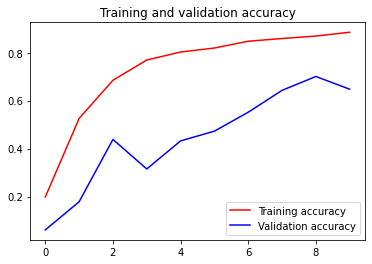

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
int_to_dir = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
TEST_DIR = "/tmp/coins/data/test"
test_datagen = ImageDataGenerator(
          rescale = 1./255,
          featurewise_std_normalization=True,
          samplewise_std_normalization=True)

step_size_test = test_generator.n//test_generator.batch_size

test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(224, 224),
        batch_size= 32,
        color_mode = 'rgb',
        shuffle = True)

Found 844 images belonging to 211 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
score = model.evaluate_generator(test_generator, steps=step_size_test//1, verbose=1)
print('\n', 'Test accuracy:', score[1])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


26/26 [==============================] - 55s 2s/step

 Test accuracy: 0.6538461446762085


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted: 200 Rupiah,Indonesian Rupiah,indonesia
Real:      200 Rupiah,Indonesian Rupiah,indonesia

Predicted: 2 Pesos,Mexican peso,mexico
Real:      2 Pesos,Mexican peso,mexico

Predicted: 50 Korun,Czech Koruna,czech_republic
Real:      50 Korun,Czech Koruna,czech_republic



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted: 1 euro Cent,Euro,spain
Real:      25 Satang,Thai Baht,thailand

Predicted: 1 Kopek,Russian Ruble,russia
Real:      1 Kopek,Russian Ruble,russia

Predicted: 50 Pence,British Pound,united_kingdom
Real:      50 Pence,British Pound,united_kingdom



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted: 50 Ore,Danish Krone,denmark
Real:      50 Ore,Danish Krone,denmark

Predicted: 1 Cent,Australian dollar,australia
Real:      2 Cents,Australian dollar,australia

Predicted: 5 Kroner,Danish Krone,denmark
Real:      20 Cents,New Zealand dollar,new_zealand



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted: 100 Won,Korean Won,south_korea
Real:      100 Won,Korean Won,south_korea



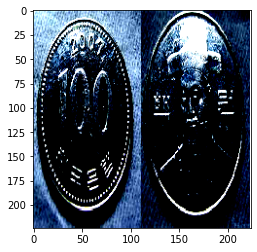

In [ ]:
def get_prediction(img, real_label):
    img = image.img_to_array(img)/255
    
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img = (img - mean)/std
    
    img_expand = np.expand_dims(img, axis=0)

    prediction = model.predict(img_expand)
    prediction_int = np.argmax(prediction)

    dir_int = int_to_dir[prediction_int]
    label_name = cat_to_name[str(dir_int)]
    
    plt.imshow(img)
    
    print("Predicted: {}\nReal:      {}".format(label_name, cat_to_name[str(real_label)]))
    print()


for i in range(10):
    random_index = np.random.randint(0, len(test_generator.filenames))
    
    img = test_generator.filenames[random_index]
    img = image.load_img("/tmp/coins/data/test/"+img, target_size=(224,224))
    real_label = test_generator.filenames[random_index].split("/")[0]

    get_prediction(img, real_label)